In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = './netflix_titles.csv'
data = pd.read_csv(file_path)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
net_df = data.copy()
net_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
#rating : '74 min', '84 min', '66 min' -> duration 으로 옮김
net_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [5]:
net_df[net_df['duration'].isnull()]
net_df.loc[[5541,5794,5813],['duration']] = net_df.loc[[5541,5794,5813],['rating']].values

In [6]:
#net_df[net_df['duration'].isnull()]
net_df.loc[[5541,5794,5813],['rating']] = np.nan
net_df.loc[[5541,5794,5813]]
net_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [7]:
net_df.isnull().sum() # 결측치 확인 및 처리

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
# Missing data
for col in net_df.columns:
    null = net_df[col].isna().sum() / len(net_df) * 100 
    if null  != 0 :
        print(f"{col} null  : {round(null,2)} %")

director null  : 29.91 %
cast null  : 9.37 %
country null  : 9.44 %
date_added null  : 0.11 %
rating null  : 0.08 %


In [9]:
# Replacments
net_df['country'].fillna('No Data', inplace=True)
net_df['cast'].fillna('No Data', inplace=True)
net_df['director'].fillna('No Data', inplace=True)

# Drops
net_df.dropna(inplace=True)

# Drop Duplicates
net_df.drop_duplicates(inplace= True)

net_df.isnull().sum()
net_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [10]:
# 특성별 분포도 확인
list(net_df.columns)
for col in list(net_df.columns):
    print(f'****{col}**** \n {net_df[col].value_counts(dropna=False)} \n\n')    

****show_id**** 
 s1       1
s5867    1
s5861    1
s5862    1
s5863    1
        ..
s2924    1
s2923    1
s2922    1
s2921    1
s8807    1
Name: show_id, Length: 8790, dtype: int64 


****type**** 
 Movie      6126
TV Show    2664
Name: type, dtype: int64 


****title**** 
 Dick Johnson Is Dead                1
Cooked                              1
My Beautiful Broken Brain           1
Pee-wee's Big Holiday               1
Netflix Presents: The Characters    1
                                   ..
Sleepless Society: Insomnia         1
Palazuelos mi rey                   1
Narcos: Mexico                      1
Love Is Blind                       1
Zubaan                              1
Name: title, Length: 8790, dtype: int64 


****director**** 
 No Data                           2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzq

In [11]:
# date_added -> year_added, month_added, day_added로 분리
# 추가 -> quarter_added, weekday_added
# date_added : type 변경 
net_df['date_added'] = pd.to_datetime(net_df['date_added'])

net_df['year_added'] = net_df['date_added'].dt.year.astype(int)
net_df['month_added'] = net_df['date_added'].dt.month.astype(int)
net_df['day_added'] = net_df['date_added'].dt.day.astype(int)


net_df['quarter_added']  = net_df['date_added'].dt.quarter.astype(int)       # 분기(숫자)
net_df['weekday_added']  = net_df['date_added'].dt.weekday.astype(int)  # 요일숫자(0-월, 1-화) (=dayofweek)
net_df['weekday_added'].replace({0:'Mon', 1:'Tues',2:'Wed',3:'Thue',4:'Fri', 5:'Sat', 6:'Sun'},inplace=True)

net_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,quarter_added,weekday_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,3,Sat
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,3,Fri
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,3,Fri
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,3,Fri
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,3,Fri


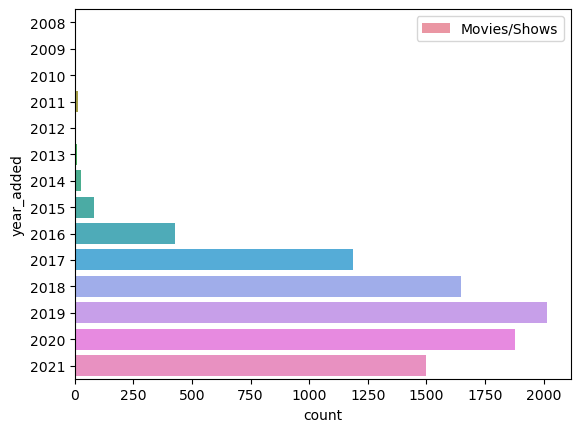

In [12]:
sns.countplot(y=net_df['year_added'],label="Movies/Shows")
xlabel = "Movies/Shows"
plt.legend()
#plt.xticks(rotation=90)

In [13]:
grouped = net_df.groupby("year_added")["title"].count()
year_added=pd.DataFrame(grouped)
year_added.columns = ['Movies & TV shows']
year_added.T

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Movies & TV shows,2,2,1,13,3,11,24,82,426,1185,1648,2016,1879,1498


[Text(0.5, 1.0, 'Movies and TV shows added to Netflix'),
 Text(0.5, 0, 'Year added'),
 Text(0, 0.5, 'Movies and TV Shows')]

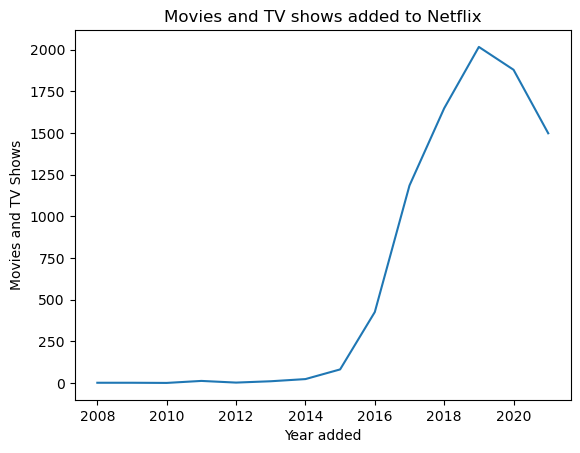

In [14]:
# sns.barplot(x = releasePerYear.index, y = releasePerYear)
sns.lineplot(x = 'year_added', y = "Movies & TV shows", data = year_added).set(
    title = "Movies and TV shows added to Netflix",
    xlabel = "Year added",
    ylabel = "Movies and TV Shows"
)

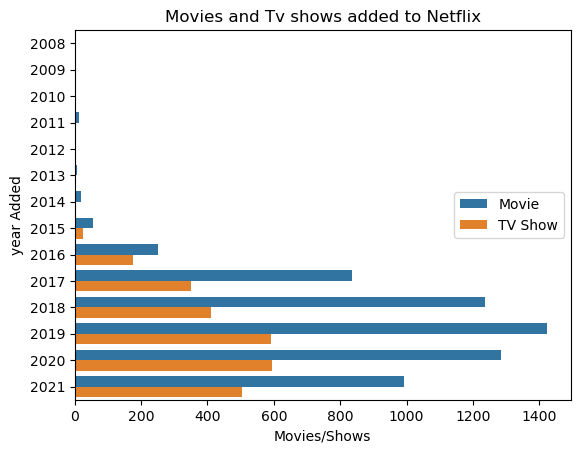

In [15]:
sns.countplot(y = net_df["year_added"], data = net_df, hue = "type").set(
    title = "Movies and Tv shows added to Netflix",
    ylabel = "year Added",
    xlabel = "Movies/Shows"
)
plt.legend()

Text(0.5, 1.0, 'Movies and TV shows added to Netflix by Month')

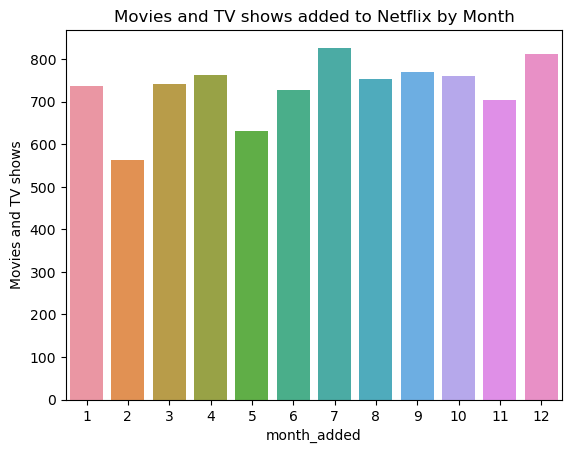

In [16]:
sns.countplot(net_df['month_added']).set(ylabel='Movies and TV shows')
plt.title("Movies and TV shows added to Netflix by Month")
#plt.xticks(rotation=90)

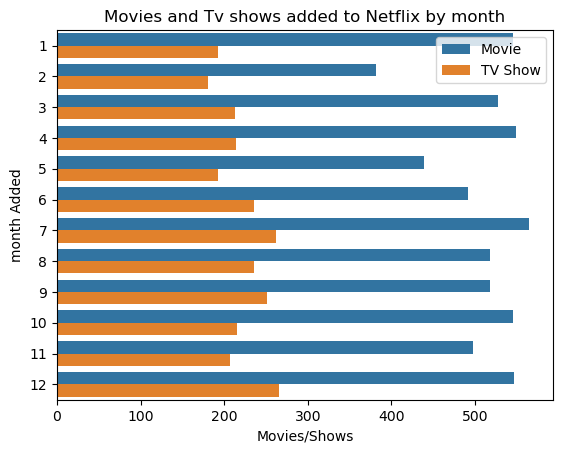

In [17]:
sns.countplot(y = net_df["month_added"], data = net_df, hue = "type").set(
    title = "Movies and Tv shows added to Netflix by month",
    ylabel = "month Added",
    xlabel = "Movies/Shows"
)
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

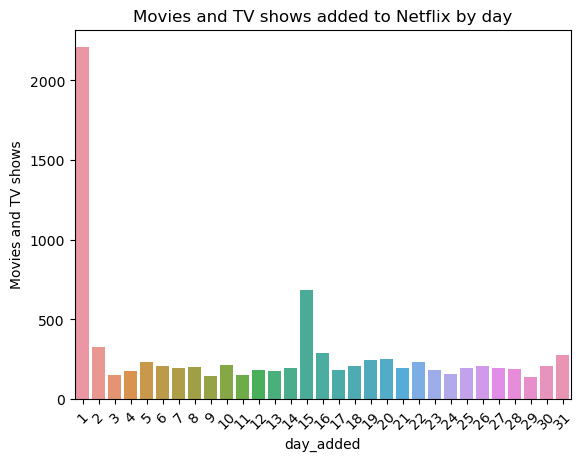

In [18]:
sns.countplot(net_df['day_added']).set(ylabel='Movies and TV shows')
plt.title("Movies and TV shows added to Netflix by day")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Movies and TV shows added to Netflix by weekday')

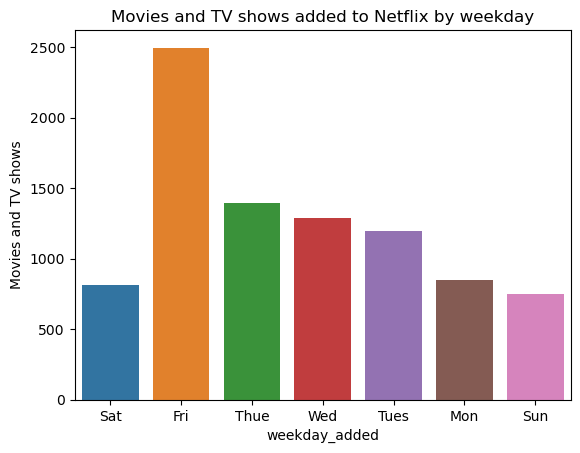

In [19]:
sns.countplot(net_df['weekday_added']).set(ylabel='Movies and TV shows')
plt.title("Movies and TV shows added to Netflix by weekday")
#plt.xticks(rotation=90)

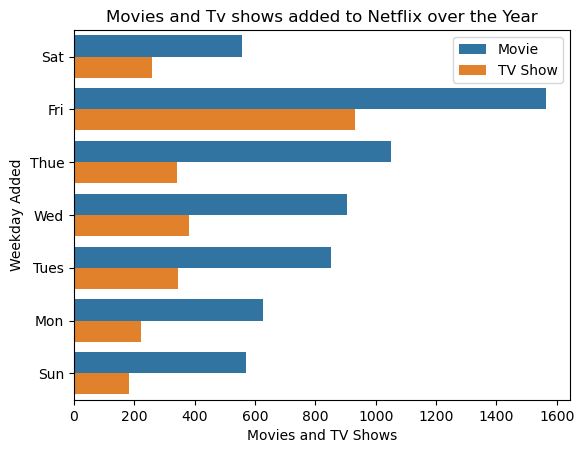

In [20]:
sns.countplot(y = net_df["weekday_added"], data = net_df, hue = "type").set(
    title = "Movies and Tv shows added to Netflix over the Year",
    ylabel = "Weekday Added",
    xlabel = "Movies and TV Shows"
)
plt.legend()

In [21]:
grouped = net_df.groupby("release_year")["title"].count()
#grouped = net_df.groupby("release_year")["title"].count()[58:]
release_year=pd.DataFrame(grouped)
release_year.columns=['Movies & TV shows']
release_year.T

release_year,1925,1942,1943,1944,1945,1946,1947,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Movies & TV shows,1,2,3,3,4,2,1,2,3,2,...,236,286,352,555,901,1030,1146,1030,953,592


[Text(0.5, 1.0, 'Movies and Tv shows released'),
 Text(0.5, 0, 'Release Year'),
 Text(0, 0.5, 'Movies and TV Shows')]

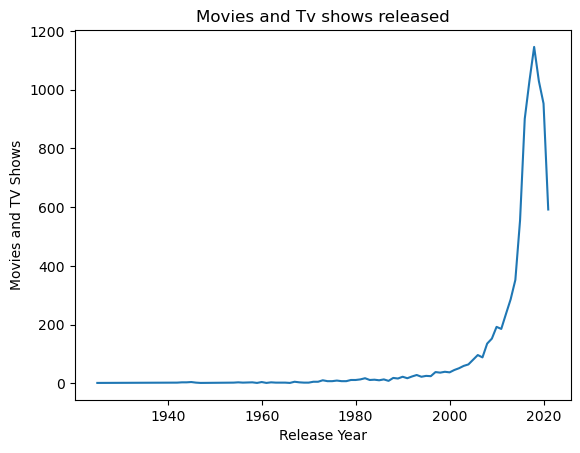

In [22]:
# sns.barplot(x = releasePerYear.index, y = releasePerYear)
sns.lineplot(x = 'release_year', y = "Movies & TV shows", data = release_year).set(
    title = "Movies and Tv shows released",
    xlabel = "Release Year",
    ylabel = "Movies and TV Shows"
)

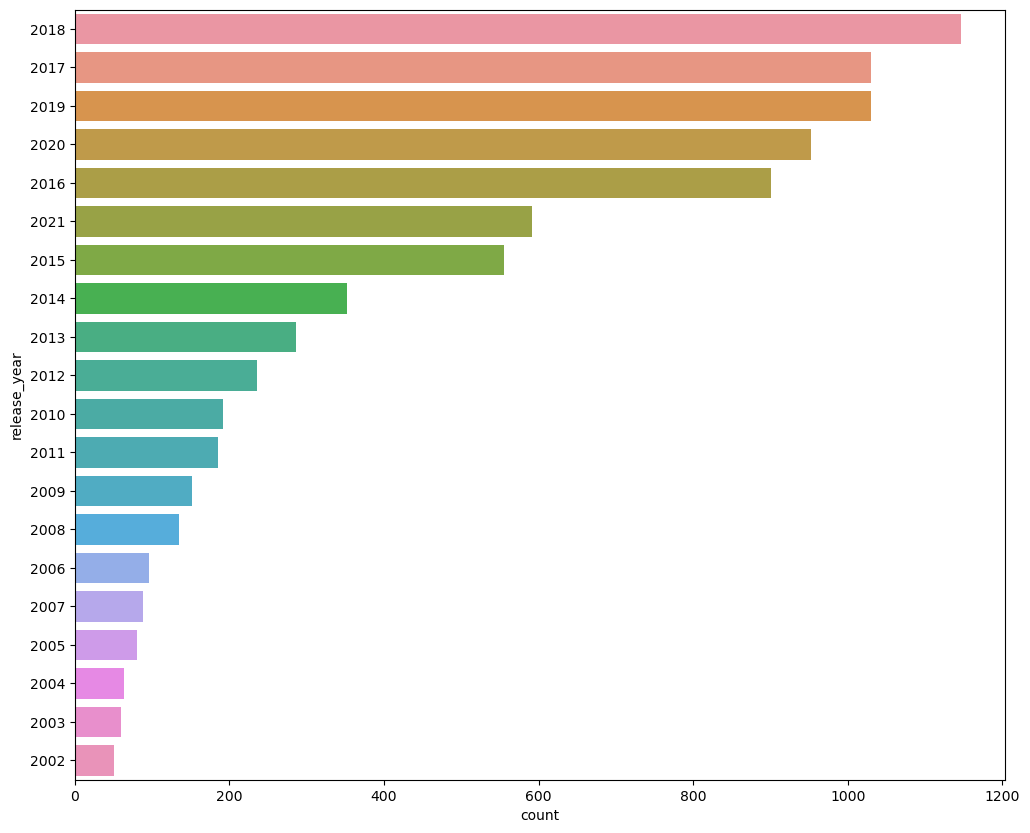

In [23]:
#order = net_df['release_year'].value_counts().sort_values(ascending=False)
order = net_df['release_year'].value_counts().sort_values(ascending=False).index[0:20]
plt.figure(figsize=(12,10))
ax = sns.countplot(y="release_year", data=net_df,order=order)

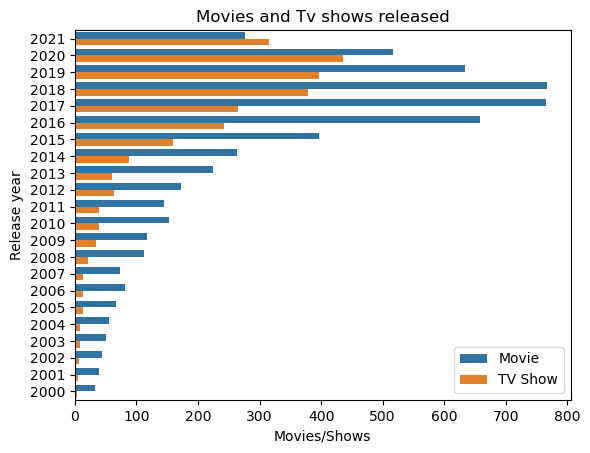

In [24]:
order = net_df['release_year'].value_counts().sort_index(ascending=False).index[0:22]
sns.countplot(y = net_df["release_year"], data = net_df, hue = "type",order=order).set(
    title = "Movies and Tv shows released",
    ylabel = "Release year",
    xlabel = "Movies/Shows"
)
plt.legend()

In [25]:
mask_tv = net_df['type'] == 'TV Show'
mask_movie = net_df['type'] == 'Movie'
net_tv = net_df[mask_tv]
net_movie = net_df[mask_movie]

#net_tv
#net_movie

In [26]:
grouped = net_df.groupby('type')['type'].count()
pd.DataFrame(grouped).T

type,Movie,TV Show
type,6126,2664


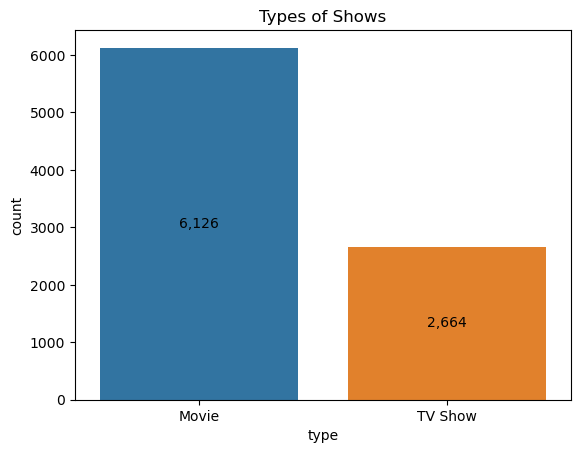

In [27]:
ax = sns.countplot(x='type', data=net_df)
containers = ax.containers[0]
ax.bar_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues],label_type='center')
plt.title("Types of Shows")
plt.show()

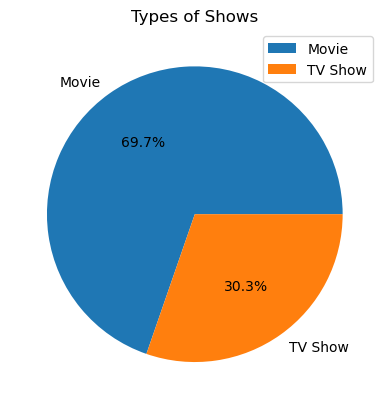

In [28]:
ax=plt.pie(x = grouped, labels= grouped.index, autopct='%.1f%%')
plt.title("Types of Shows")
plt.legend()
plt.show()

In [29]:
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

net_df['rating_ages'] = net_df['rating']
net_df['rating_ages'] = net_df['rating'].replace(rating_ages)
net_df['rating_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [30]:
net_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,quarter_added,weekday_added,rating_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,3,Sat,Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,3,Fri,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,3,Fri,Adults
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,3,Fri,Adults
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,3,Fri,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,20,4,Wed,Adults
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,No Data,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,1,3,Mon,Older Kids
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,1,4,Fri,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,11,1,Sat,Older Kids


In [31]:
rating = net_df['rating'].value_counts()
rating_df = pd.DataFrame(rating)
rating_df.T

,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y7,TV-Y,PG,TV-G,NR,G,TV-Y7-FV,NC-17,UR
rating,3205,2157,861,799,490,333,306,287,220,79,41,6,3,3


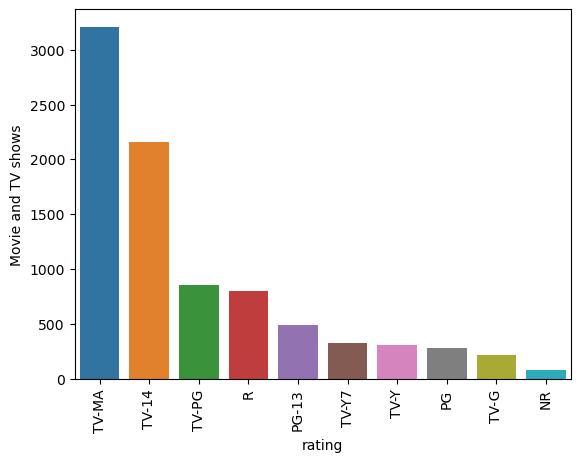

In [32]:
order = net_df['rating'].value_counts().sort_values(ascending=False).index[0:10]
sns.countplot(x='rating',data=net_df,order=order).set(ylabel="Movie and TV shows")
plt.xticks(rotation=90)
plt.show()

[Text(0.5, 1.0, 'Rating of Tv Shows/ Movies'),
 Text(0, 0.5, 'Rating'),
 Text(0.5, 0, 'Movie & TV Shows')]

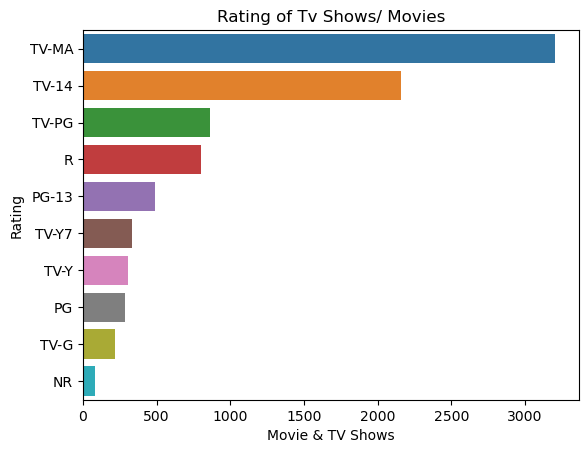

In [33]:
order = net_df['rating'].value_counts().sort_values(ascending=False).index[0:10]
sns.barplot(y = rating.index, x = rating,order=order).set(
    title = "Rating of Tv Shows/ Movies",
    ylabel = "Rating",
    xlabel = "Movie & TV Shows"
)

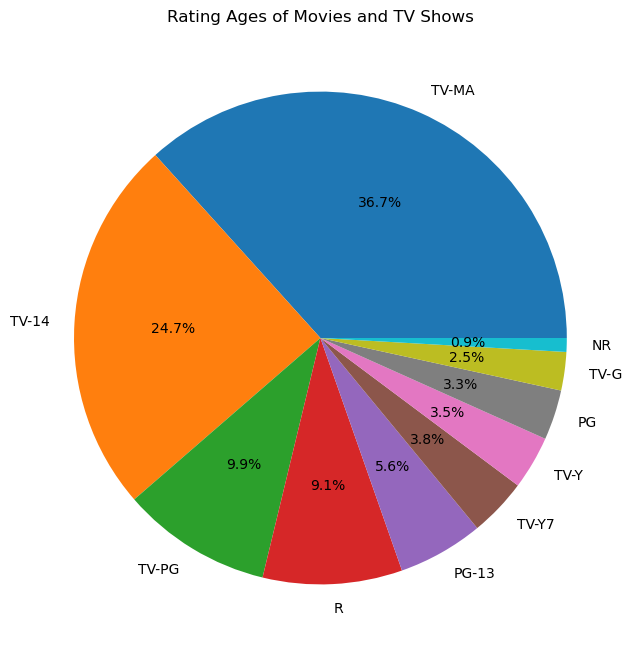

In [34]:
#order = net_df['rating'].value_counts().sort_values(ascending=False).index[0:10]
plt.figure(figsize=(8,8))
plt.pie(x = rating[:10], labels= rating.index[:10], autopct='%.1f%%')
plt.title("Rating Ages of Movies and TV Shows")
#plt.legend()
plt.show()

In [35]:
grouped = net_df.groupby('rating_ages')['rating_ages'].count()
grouped_df = pd.DataFrame(grouped)
grouped_df.T

rating_ages,Adults,Kids,Older Kids,Teens
rating_ages,4089,567,1487,2647


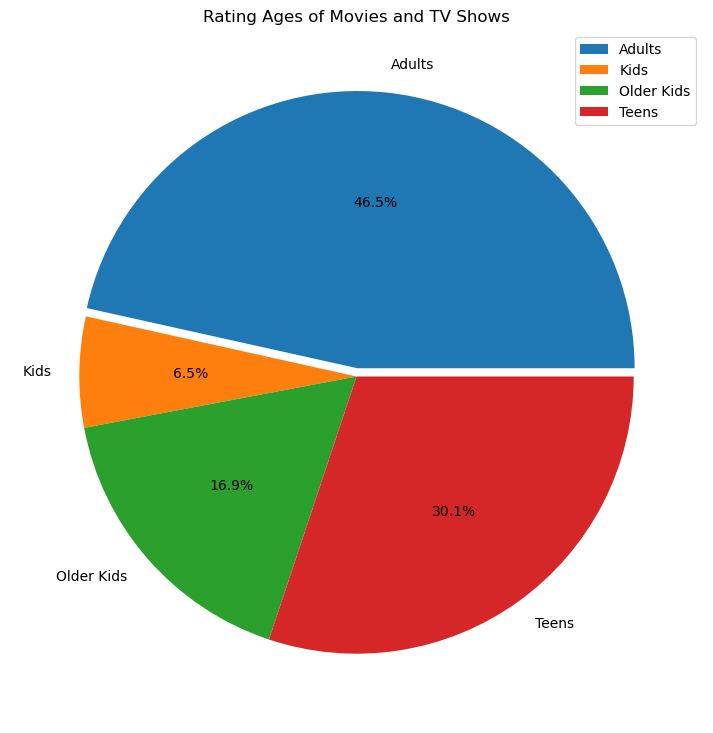

In [36]:
plt.figure(figsize=(9,9))
plt.pie(x = grouped, labels= grouped.index, autopct='%.1f%%', explode=[0.03,0,0,0])
plt.title("Rating Ages of Movies and TV Shows")
plt.legend()
plt.show()

movies rating

In [37]:
net_movie['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

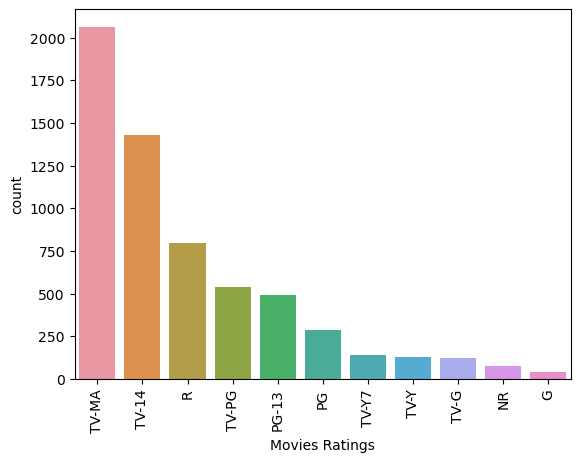

In [38]:
order = net_movie['rating'].value_counts().sort_values(ascending=False).index[0:11]
sns.countplot(x='rating',data=net_movie,order=order).set(xlabel='Movies Ratings')
plt.xticks(rotation=90)
plt.show()

TV shows rating

In [39]:
net_movie['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

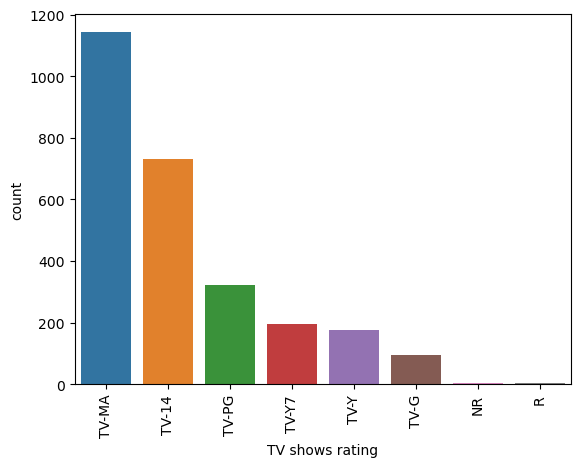

In [40]:
order = net_tv['rating'].value_counts().sort_values(ascending=False).index[0:8]
sns.countplot(x='rating',data=net_tv,order=order).set(xlabel='TV shows rating')
plt.xticks(rotation=90)
plt.show()

In [41]:
grouped = net_df.groupby(['rating','type'])['title'].count().sort_values(ascending=False)
grouped

rating    type   
TV-MA     Movie      2062
TV-14     Movie      1427
TV-MA     TV Show    1143
R         Movie       797
TV-14     TV Show     730
TV-PG     Movie       540
PG-13     Movie       490
TV-PG     TV Show     321
PG        Movie       287
TV-Y7     TV Show     194
TV-Y      TV Show     175
TV-Y7     Movie       139
TV-Y      Movie       131
TV-G      Movie       126
          TV Show      94
NR        Movie        75
G         Movie        41
TV-Y7-FV  Movie         5
NR        TV Show       4
NC-17     Movie         3
UR        Movie         3
R         TV Show       2
TV-Y7-FV  TV Show       1
Name: title, dtype: int64

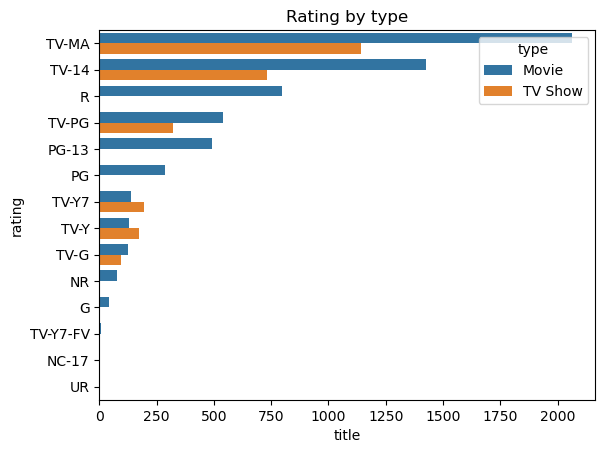

In [42]:
ax = sns.barplot(data=grouped.reset_index(), y='rating', x='title', hue='type')

#containers = ax.containers[-1]
#containers0 = ax.containers[0]
#ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
#ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Rating by type')
plt.show()

In [43]:
net_df.groupby(['year_added','rating'])['title'].count().sort_index(ascending=False)

year_added  rating
2021        TV-Y7      87
            TV-Y       57
            TV-PG      97
            TV-MA     489
            TV-G       44
                     ... 
2011        TV-MA       3
            TV-14       5
2010        NR          1
2009        TV-MA       2
2008        TV-MA       2
Name: title, Length: 106, dtype: int64

[Text(0.5, 1.0, 'Rating by Year Added'),
 Text(0, 0.5, 'Year Added'),
 Text(0.5, 0, 'Movies and TV shows')]

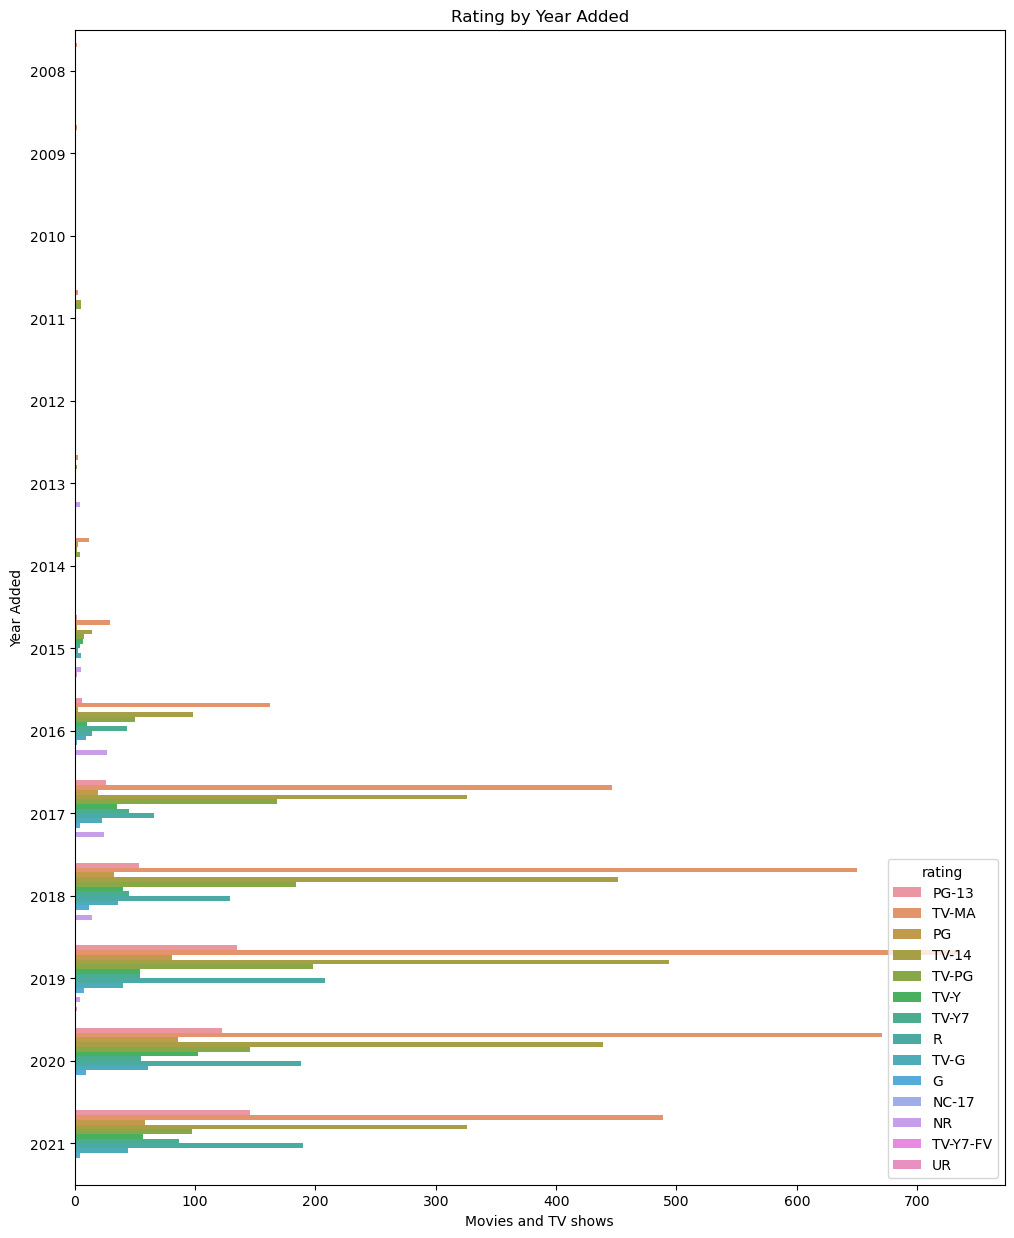

In [44]:
plt.figure(figsize=(12,15))
sns.countplot(y = "year_added", data = net_df, hue = "rating").set(
    title = "Rating by Year Added",
    ylabel = "Year Added",
    xlabel = "Movies and TV shows"
)

In [45]:
#net_df[net_df['duration'].isnull()]
#net_df.loc[[5541,5794,5813],['duration']] = net_df.loc[[5541,5794,5813],['rating']].values

In [46]:
#net_df.loc[[5541,5794,5813],['rating']] = np.nan
#net_df.loc[[5541,5794,5813]]
#net_df.rating.unique()

In [47]:
top10 = net_df['duration'].value_counts()[:20]
top10_df = pd.DataFrame(top10)
top10_df

,duration
1 Season,1791
2 Seasons,421
3 Seasons,198
90 min,152
94 min,146
97 min,146
93 min,146
91 min,144
95 min,137
96 min,130


[Text(0.5, 1.0, 'Duration of Movies and TV Shows'),
 Text(0.5, 0, 'Duration'),
 Text(0, 0.5, 'No. of Movies and TV Show')]

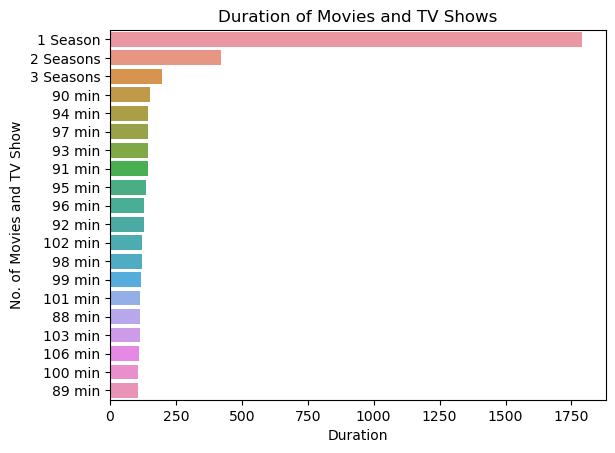

In [48]:
top10 = net_df["duration"].value_counts().sort_values(ascending=False)[:20]
sns.barplot(y = top10.index, x =top10).set(
    title = "Duration of Movies and TV Shows",
    xlabel = "Duration",
    ylabel = "No. of Movies and TV Show")

In [49]:
mask_tv = net_df['type'] == 'TV Show'
mask_movie = net_df['type'] == 'Movie'

net_tv = net_df[mask_tv]
net_movie = net_df[mask_movie]

In [50]:
temp_df = net_tv['duration'].value_counts()[:]
temf_df = pd.DataFrame(temp_df)
temf_df
temp_df[0]/temf_df.sum()

duration    0.672297
dtype: float64

In [51]:
net_tv[net_tv['duration'] == "17 Seasons"].title

548    Grey's Anatomy
Name: title, dtype: object

[Text(0.5, 1.0, 'Duration of TV Shows'),
 Text(0, 0.5, 'Duration'),
 Text(0.5, 0, 'TV Shows')]

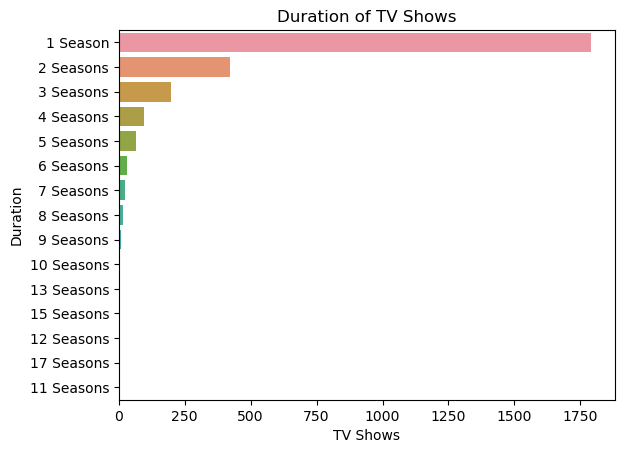

In [52]:
top10 = net_tv["duration"].value_counts()[:]
sns.barplot(y = top10.index, x =top10).set(
    title = "Duration of TV Shows",
    ylabel = "Duration",
    xlabel = "TV Shows")

In [53]:
net_movie['duration'].value_counts()[:]

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

[Text(0.5, 1.0, 'Duration of Movies'),
 Text(0, 0.5, 'Duration'),
 Text(0.5, 0, 'Movies')]

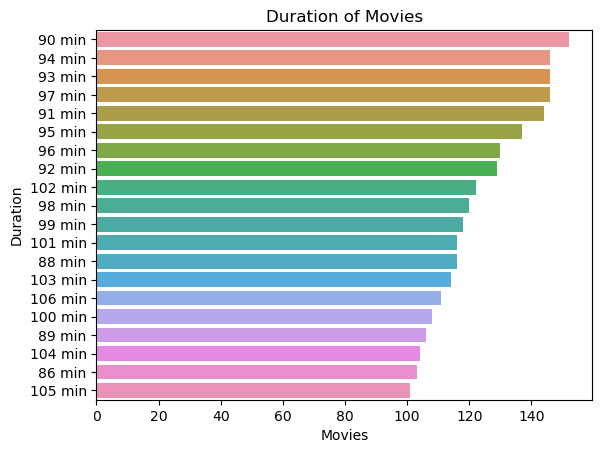

In [54]:
top10 = net_movie["duration"].value_counts()[:20]
sns.barplot(y = top10.index, x =top10).set(
    title = "Duration of Movies",
    ylabel = "Duration",
    xlabel = "Movies")

In [55]:
# duration type변경 : int
net_movie['duration'] = net_movie['duration'].str.replace(' min','')
net_movie['duration']= net_movie['duration'].astype(str).astype(int)

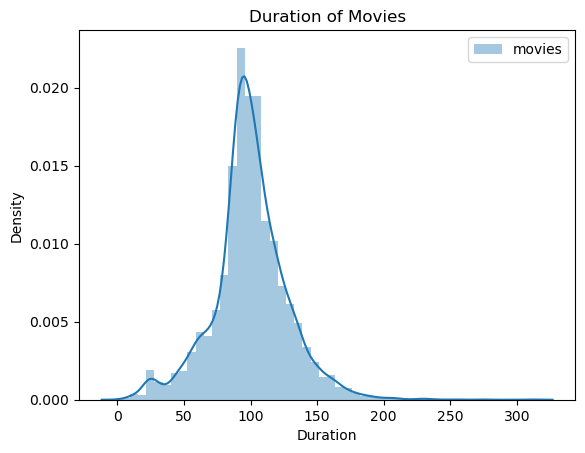

In [56]:
sns.distplot(net_movie['duration'],label='movies').set(
    title = "Duration of Movies",
    xlabel = "Duration")
plt.legend()

75-120 mins.에 몰려있음 

In [57]:
net_director = net_df[net_df['director'] != 'No Data']
grouped=net_director['director'].value_counts()[:10]


In [58]:
grouped_df = pd.DataFrame(grouped)
grouped_df.columns =['Movies & TV shows']
grouped_df

,Movies & TV shows
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Jay Chapman,12
Youssef Chahine,12
Steven Spielberg,11


In [59]:
#top10 = list(net_director['director'].value_counts().index[:10])
#mask = net_director['director'].isin(top10)
#net_director[mask]

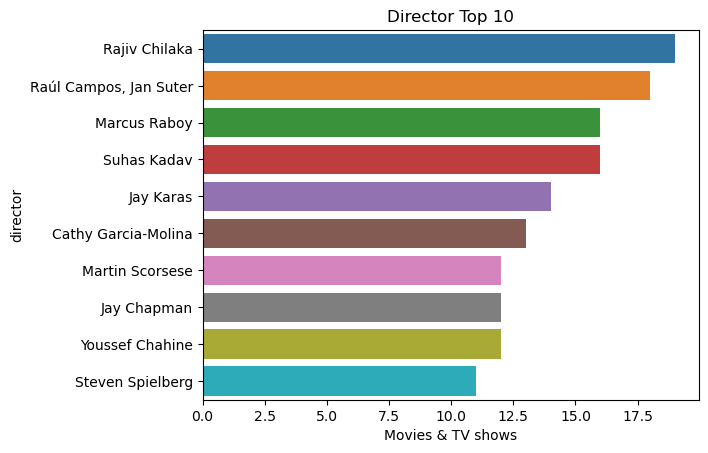

In [60]:
#plt.figure(figsize=(12,10))
ax = sns.countplot(y="director", data=net_director,order=net_director['director'].value_counts().index[0:10]).set(xlabel='Movies & TV shows',title='Director Top 10')


In [61]:
net_director_tv = net_tv[net_tv['director'] != 'No Data']
net_director_tv['director'].value_counts().nlargest(10)

Alastair Fothergill    3
Rob Seidenglanz        2
Hsu Fu-chun            2
Iginio Straffi         2
Shin Won-ho            2
Ken Burns              2
Stan Lathan            2
Thomas Astruc          1
Quek Shio-chuan        1
Elías León             1
Name: director, dtype: int64

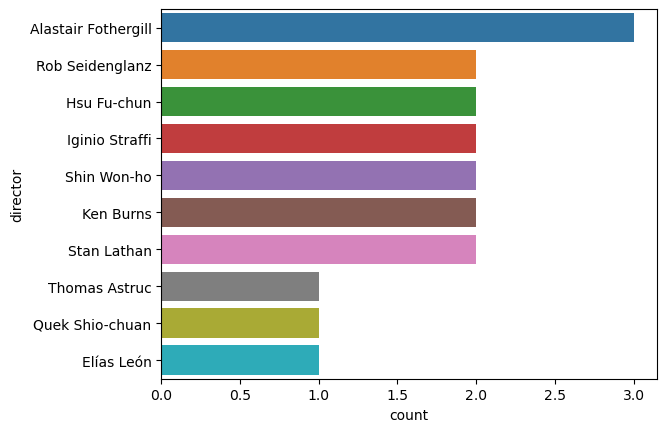

In [62]:
#plt.figure(figsize=(12,10)
ax = sns.countplot(y="director", data=net_director_tv,order=net_director_tv['director'].value_counts().index[:10])

In [63]:
net_director_movie = net_movie[net_movie['director'] != 'No Data']
net_director_movie['director'].value_counts().nlargest(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

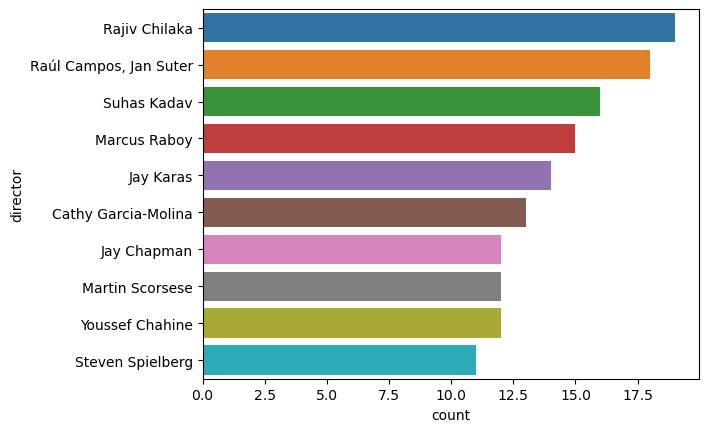

In [64]:
#plt.figure(figsize=(12,10)
ax = sns.countplot(y="director", data=net_director_movie,order=net_director_movie['director'].value_counts().index[:10])

In [65]:
# cast_df 생성 : listed_in 다중 리스트를 genre 에 단일 value로 바꿔 줌  

cast_df = net_df[['show_id', 'cast']].loc[net_df['cast'] != 'No Data']
cast_df['cast'] = cast_df['cast'].apply(lambda x: x.split(', '))
cast_df

,show_id,cast
1,s2,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,s3,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
4,s5,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."
5,s6,"[Kate Siegel, Zach Gilford, Hamish Linklater, ..."
6,s7,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,..."
...,...,...
8801,s8802,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,..."
8802,s8803,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ..."
8804,s8805,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,..."
8805,s8806,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M..."


In [66]:
id_list, cast_list = [], []
for index in cast_df.index:
    id = cast_df.at[index, 'show_id']
    casts = cast_df.at[index, 'cast']
    for cast in casts:
        id_list.append(id)
        cast_list.append(cast)
        
cast_df = pd.DataFrame()
cast_df = cast_df.assign(id=id_list, cast=cast_list)
cast_df

,id,cast
0,s2,Ama Qamata
1,s2,Khosi Ngema
2,s2,Gail Mabalane
3,s2,Thabang Molaba
4,s2,Dillon Windvogel
...,...,...
64011,s8807,Manish Chaudhary
64012,s8807,Meghna Malik
64013,s8807,Malkeet Rauni
64014,s8807,Anita Shabdish


In [67]:
grouped = cast_df.groupby('cast')['id'].count().sort_values(ascending=False)[:10]
grouped_df = pd.DataFrame(grouped)
grouped_df.columns=['Movies & TV shows']
grouped_df.reset_index()

,cast,Movies & TV shows
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Takahiro Sakurai,32
4,Naseeruddin Shah,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


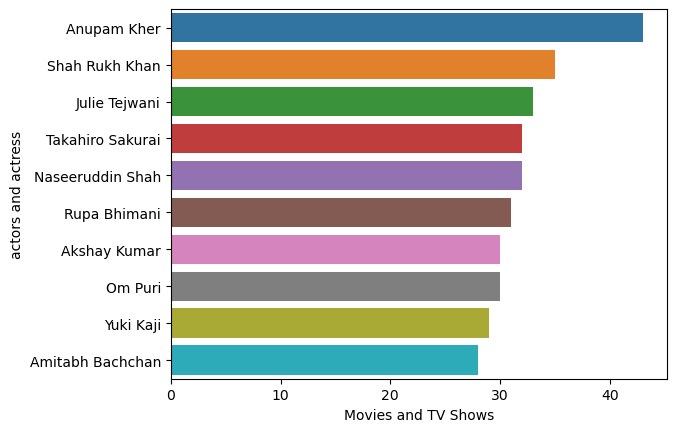

In [68]:
#plt.figure(figsize=(12,10))
ax = sns.barplot(y=grouped.index, x=grouped).set(ylabel='actors and actress',xlabel='Movies and TV Shows')

In [69]:
# genre columes 추가
#net_df['genre'] = net_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
#net_df

In [70]:
# genre_df 생성 : listed_in 다중 리스트를 genre 에 단일 value로 바꿔 줌  
genre_df = net_df[['show_id', 'listed_in']]
genre_df['listed_in'] = net_df['listed_in'].apply(lambda x: x.split(', '))

id_list, genre_list = [], []
for index in genre_df.index:
    id = genre_df.at[index, 'show_id']
    genres = genre_df.at[index, 'listed_in']
    for genre in genres:
        id_list.append(id)
        genre_list.append(genre)
        
genre_df = pd.DataFrame()
genre_df = genre_df.assign(id=id_list, genre=genre_list)
genre_df

,id,genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
...,...,...
19289,s8806,Children & Family Movies
19290,s8806,Comedies
19291,s8807,Dramas
19292,s8807,International Movies


In [71]:
grouped = genre_df.groupby('genre')['id'].count().sort_values(ascending=False)[:10]
grouped_df = pd.DataFrame(grouped)
grouped_df.columns=['Movies & TV shows']
grouped_df.reset_index()

,genre,Movies & TV shows
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1349
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,762
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


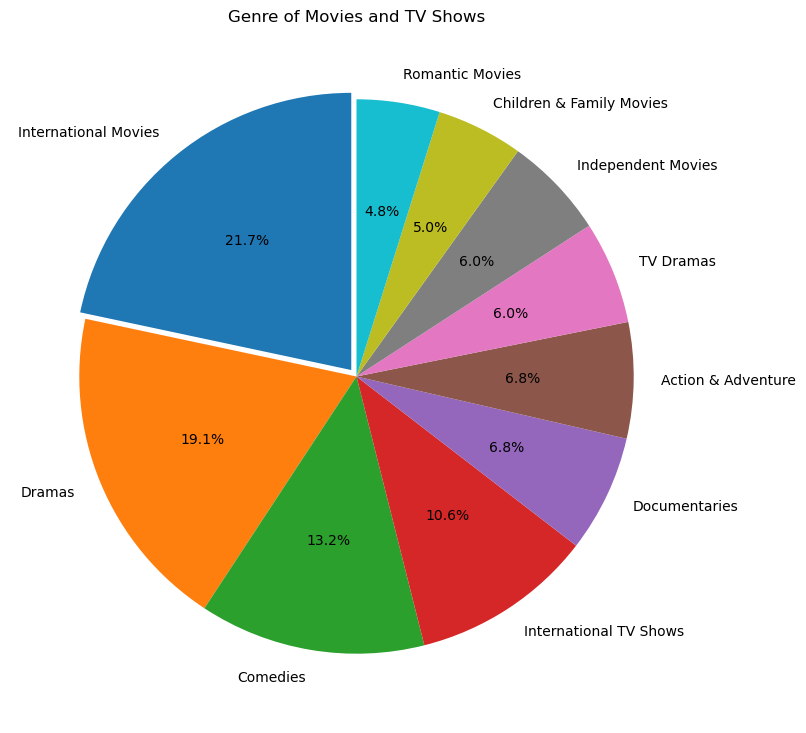

In [72]:
plt.figure(figsize=(9,9))
plt.pie(x = grouped, labels= grouped.index, autopct='%.1f%%', startangle=90,explode=[0.03,0,0,0,0,0,0,0,0,0])
plt.title("Genre of Movies and TV Shows")
#plt.legend(loc=1)
plt.show()